# Machine Learning Model Prediction





## Data Preparation

### Required Specific Libraries

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as matplt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score, confusion_matrix, precision_score, recall_score




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import dataset

In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Exam/LA4PSchools.csv')

In [ ]:
dataframe['Year3_Writing_At_Risk'] = dataframe['Year3_Writing_At_Risk'].map({False: 0, True: 1})

## Preprocess the data

In [ ]:
dataframe.drop(["StudentID"],axis=1,inplace=True)

## For Encoding Categorical data

In [ ]:
change_values = {
  'Gender': {
    'Male': 0,
    'Female': 1
  }
}

dataframe.replace(change_values, inplace=True)

In [ ]:
dataframe.head()

,Gender,Year_02,Kinder_Age,Disability,NCCD-Funded,01.SES,02.SES,NumSibling,SiblingOrder,NumAbvYear9,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,0,2020,5.5,Disability_Non-disable,0,104,104,3,3,2,...,49,4,5,2,2,2,4,2,2,0
1,1,2018,5.8,Disability_Non-disable,0,112,112,2,2,2,...,37,2,1,1,1,2,3,0,2,0
2,0,2021,5.9,Disability_Non-disable,0,120,109,2,2,2,...,30,2,1,1,2,2,1,2,1,0
3,0,2021,5.7,Disability_Non-disable,0,95,93,2,1,0,...,30,2,3,1,2,1,5,2,2,0
4,0,2021,5.8,Disability_Non-disable,0,98,98,1,1,2,...,32,2,4,2,2,2,4,1,1,1


In [ ]:
dataframe_copy = dataframe

In [ ]:
disability_transformer = make_column_transformer(
  (OneHotEncoder(), ['Disability']),
  remainder='passthrough',
  verbose_feature_names_out=False
)

dataframe = dataframe_copy

work_type_transformed = disability_transformer.fit_transform(dataframe)
dataframe = pd.DataFrame(work_type_transformed, columns=disability_transformer.get_feature_names_out())
dataframe.head(5)

,Disability_Disability_Cognitive,Disability_Disability_Non-disable,Disability_Disability_Physical,Disability_Disability_Sensory,Disability_Disability_SocialEmotional,Gender,Year_02,Kinder_Age,NCCD-Funded,01.SES,...,HRSIW-01-SOY,Counting-01,Counting-02,Place Value-01,Place Value-02,Addition and Subtraction-01,Addition and Subtraction-02,Multiplication and Division-01,Multiplication and Division-02,Year3_Writing_At_Risk
0,0.0,1.0,0.0,0.0,0.0,0.0,2020.0,5.5,0.0,104.0,...,49.0,4.0,5.0,2.0,2.0,2.0,4.0,2.0,2.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,2018.0,5.8,0.0,112.0,...,37.0,2.0,1.0,1.0,1.0,2.0,3.0,0.0,2.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.9,0.0,120.0,...,30.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.7,0.0,95.0,...,30.0,2.0,3.0,1.0,2.0,1.0,5.0,2.0,2.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,2021.0,5.8,0.0,98.0,...,32.0,2.0,4.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0


# Model Training

In [ ]:
depent_axis = dataframe["Year3_Writing_At_Risk"]
independent_axis = dataframe.drop(["Year3_Writing_At_Risk"],axis=1)

## Scaling Dataset from Standardize

In [ ]:
scaler = StandardScaler()
independent_axis = scaler.fit_transform(independent_axis)
independent_axis

array([[-0.55347604,  0.66949677, -0.18617505, ...,  1.50799757,
         1.10357108,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ...,  0.64257572,
        -1.28381903,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ..., -1.08826797,
         1.10357108, -1.03345623],
       ...,
       [-0.55347604,  0.66949677, -0.18617505, ..., -0.22284613,
        -1.28381903,  0.26241365],
       [-0.55347604,  0.66949677, -0.18617505, ...,  1.50799757,
        -0.09012398,  0.26241365],
       [ 1.80676294, -1.49365919, -0.18617505, ..., -0.22284613,
         1.10357108,  2.85415341]])

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

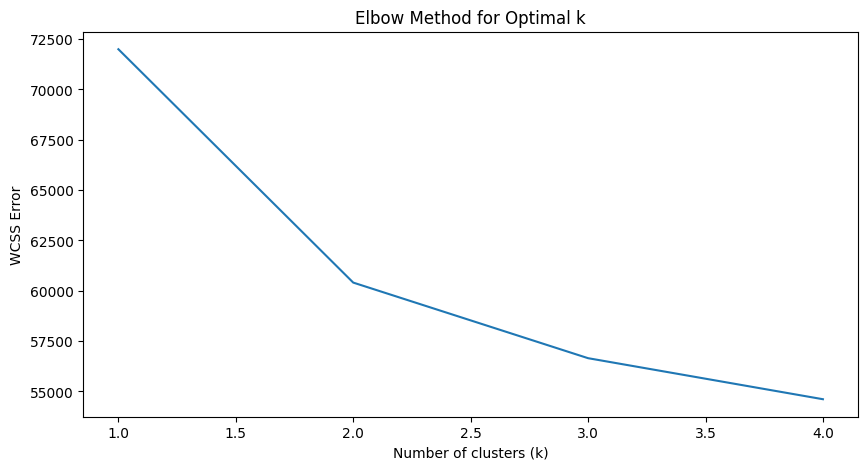

In [ ]:
# Determine the number of clusters (k) using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(independent_axis)  # Using the features
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS Error')
plt.show()

In [ ]:
wcss

[71999.99999999997, 60408.88619173092, 56653.825553083385, 54615.53781676896]

In [ ]:
# Assuming optimal k is chosen, say k=2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

In [ ]:
# Fit and predict clusters
clusters = kmeans.fit_predict(independent_axis)
dataframe['cluster'] = clusters

In [ ]:
# Optional: Use PCA to reduce dimensions to 2 for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(independent_axis)

In [ ]:
visualization_df = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
visualization_df['cluster'] = clusters

<Axes: xlabel='PCA1', ylabel='PCA2'>

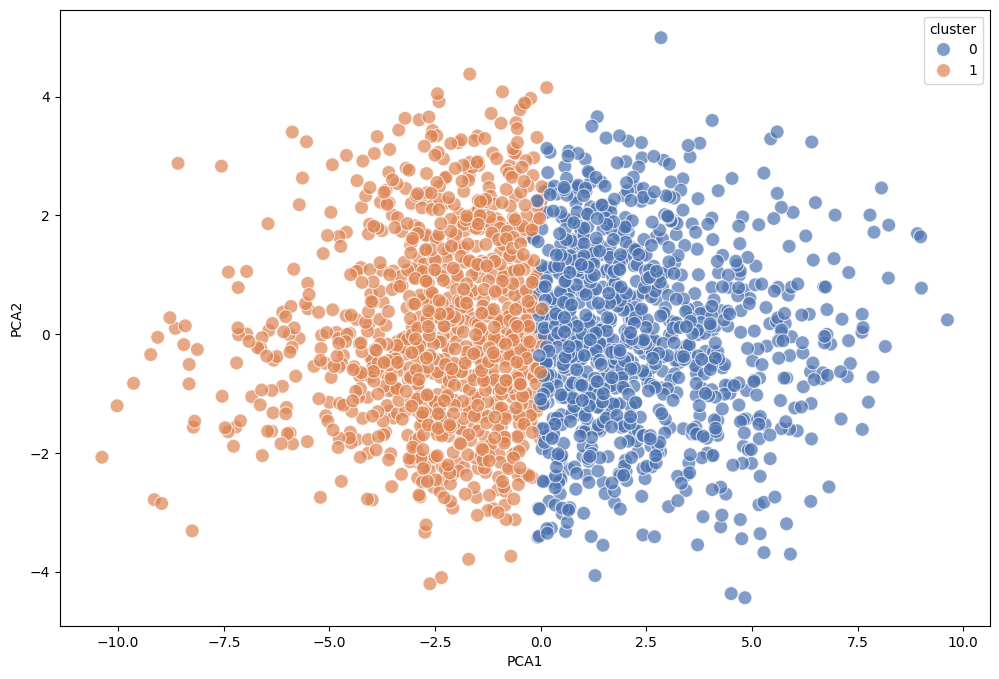

In [ ]:
# Plotting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=visualization_df, x='PCA1', y='PCA2', hue='cluster', palette='deep', s=100, alpha=0.7)


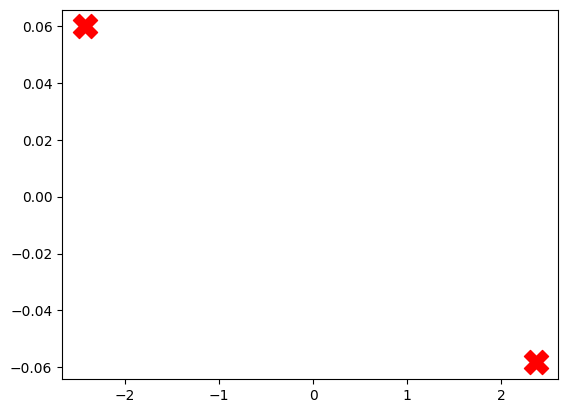

In [ ]:
# Plotting centroids
centroids = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')


In [ ]:
labels = kmeans.labels_

In [ ]:
correct_labels = sum(depent_axis == labels)

In [ ]:
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, depent_axis.size))

Result: 1373 out of 2000 samples were correctly labeled.


In [ ]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(depent_axis.size)))

Accuracy score: 0.69
